In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TAZ78\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TAZ78\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
df = pd.read_csv('Email_Text.csv')
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53661 entries, 0 to 53660
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   53661 non-null  int64 
 1   text    53661 non-null  object
dtypes: int64(1), object(1)
memory usage: 838.6+ KB


In [6]:
#Split to training and testing
X = df['text']
Y = df['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=42)

#USE TF-IDF Vectorizer to convert text into features
stop_words = stopwords.words('english')
TFIDF = TfidfVectorizer(stop_words=stop_words)

#Transform Training and Testing Data
X_train_TFIDF = TFIDF.fit_transform(X_train)
X_test_TFDIF = TFIDF.transform(X_test)

In [7]:
#Train the Naive Bayes Model
Model = MultinomialNB()
Model.fit(X_train_TFIDF, Y_train)

#Make Predictions on the test set
Y_pred = Model.predict(X_test_TFDIF)

Accuracy: 0.9720488213919687
Classification Repor: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      4711
           1       0.99      0.96      0.97      6022

    accuracy                           0.97     10733
   macro avg       0.97      0.97      0.97     10733
weighted avg       0.97      0.97      0.97     10733



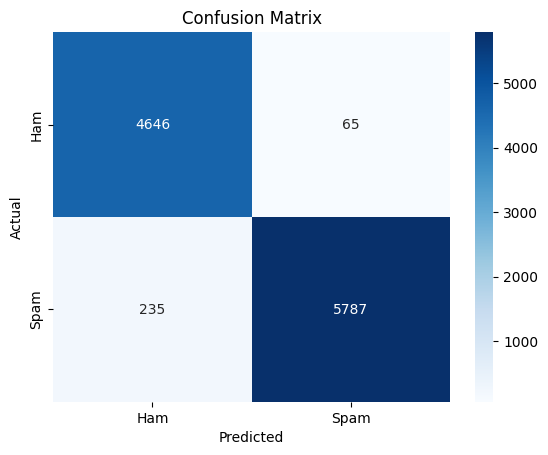

In [9]:
#Evaluate Model Accuracy
Accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {Accuracy}')

#Generate and print Classification Report
print("Classification Repor: ")
print(classification_report(Y_test, Y_pred))

#Plot Confusion Matrix
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
